Se utilizaran Redes neuronales recurrentes para predecir los precios de las acciones, se intentara predecir la variable "Close" que es el precio de cierre. (precio del activo al final de los 5 minutos)



In [15]:
#Importamos las librerias que necesitamos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos_train = pd.read_csv('/content/s0001_train.csv')

training_set  = datos_train.iloc[:, 4:5].values
training_set

array([[1.6737],
       [1.6733],
       [1.6514],
       ...,
       [1.245 ],
       [1.2453],
       [1.2422]])

In [6]:
datos_train.head()

,Open_time,Open,High,Low,Close,Volume,QV,NOT,TBB,TBQ,Volatility,target
0,2021-05-13 09:00:00,1.6625,1.6800,1.6623,1.6737,2878032.99,4.821304e+06,5125,1702161.28,2.851617e+06,0.673684,0
1,2021-05-13 09:05:00,1.6738,1.6790,1.6686,1.6733,2723854.15,4.558141e+06,4318,1516726.12,2.538139e+06,-0.029872,0
2,2021-05-13 09:10:00,1.6734,1.6749,1.6496,1.6514,3653708.06,6.075417e+06,5561,1625405.03,2.702822e+06,-1.314689,1
3,2021-05-13 09:15:00,1.6515,1.6708,1.6500,1.6693,3313388.75,5.505110e+06,5374,1797877.23,2.987432e+06,1.077808,0
4,2021-05-13 09:20:00,1.6690,1.6728,1.6587,1.6668,3478711.17,5.794350e+06,5799,1736515.81,2.892649e+06,-0.131815,0


In [16]:
#escalamos las caracteristicas

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
#Creamos una estructura de datos con 60 timesteps y 1 salida

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
#Redimensionamos los dtos
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
#creamos la red neuronal recurrente

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
regressor = Sequential()

In [21]:
# Se agrega una capa LSTM
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1) ))
regressor.add(Dropout(0.2))

In [22]:
#Segunda capa de LSTM
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

In [23]:
#Tercera capa de LSTM
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

In [24]:
#Cuarta LSTM
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [25]:
# capa de salida
regressor.add(Dense(units = 1))

In [26]:
#Compilamos el modelo
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 111ms/step - loss: 0.0767
Epoch 2/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0117
Epoch 3/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0083
Epoch 4/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0078
Epoch 5/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0060
Epoch 6/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0057
Epoch 7/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0060
Epoch 8/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0058
Epoch 9/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0052
Epoch 10/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0051
Epoch 11/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0045
Epoch 13/100

In [28]:
#AJUSTAMOS LAS PREDICCIONES Y VISUALIZAMOS LOS RESULTADOS

dataset_test = pd.read_csv('/content/s0001_X_test.csv')
real_stock_price = dataset_test.iloc[:, 4:5].values

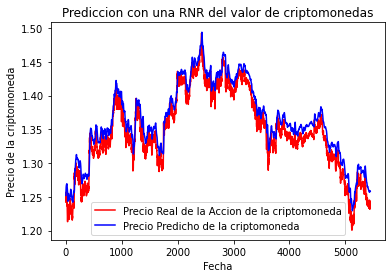

In [54]:
dataset_total = pd.concat((datos_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 5504):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizar los Resultados
plt.plot(real_stock_price, color = 'red', label = 'Precio Real de la Accion de la criptomoneda')
plt.plot(predicted_stock_price, color = 'blue', label = 'Precio Predicho de la criptomoneda')
plt.title("Prediccion con una RNR del valor de criptomonedas")
plt.xlabel("Fecha")
plt.ylabel("Precio de la criptomoneda")
plt.legend()
plt.show()

In [72]:
#Creamos un dataframe con las predicciones y valores reales
valores = pd.DataFrame(real_stock_price)
valores.predichos = pd.DataFrame(predicted_stock_price)
valores['predicted'] = valores.predichos

valores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,0,predicted
0,1.2423,1.252247
1,1.2449,1.254527
2,1.2451,1.256774
3,1.2477,1.258793
4,1.2552,1.260497
...,...,...
5438,1.2370,1.258839
5439,1.2406,1.258756
5440,1.2389,1.258529
5441,1.2435,1.258276
